In [1]:
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mushi.utils import prf

mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

In [2]:
heatmap_data = []
for i, f in enumerate(glob.glob('output/eta_sweep/*/dat*')):
    alpha_params, beta_params, ksfs, eta_true, mu_true = pickle.load(open(f, 'rb'))
    loss = float(-prf(ksfs.mu.Z, ksfs.X, ksfs.L))
    heatmap_data.append([alpha_params['alpha_tv'], alpha_params['alpha_spline'], loss, ksfs])

heatmap_data = np.array(heatmap_data)
heatmap_data = heatmap_data[np.lexsort(heatmap_data[:, 1::-1].T)]
# delta loss
heatmap_data[:, 2] = heatmap_data[:, 2] - heatmap_data[0, 2]

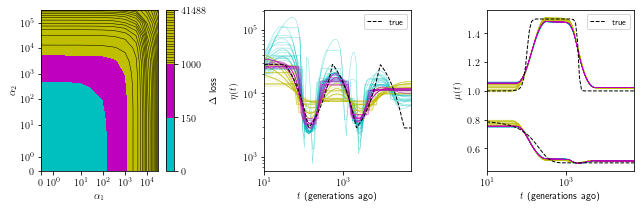

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

plt.sca(axes[0])
x = np.unique(heatmap_data[:, 0])
y = np.unique(heatmap_data[:, 1])
Z = heatmap_data[:, 2].reshape(len(x), len(y)).T
contour = plt.contour(x, y, Z, levels=20, colors='k', linewidths=.5)
heatmap = plt.contourf(contour, levels=[0, 150, 1000, Z.max()], colors=['c', 'm', 'y'])
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel(r'$\Delta$ loss')
# Add the contour line levels to the colorbar
cbar.add_lines(contour)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'$\alpha_1$')
plt.ylabel(r'$\alpha_2$')

for i, data in enumerate(heatmap_data):
    alpha_tv, alpha_spline, relative_loss, ksfs = data
        
    if heatmap.levels[1] <= relative_loss <= heatmap.levels[2]:
        alpha = .9
        zorder = 2
        color = 'm'
        lw = 0.2
    elif relative_loss <= heatmap.levels[1]:
        alpha = .5
        zorder = 1
        color = 'c'
        lw = .5
    else:
        alpha = .25
        zorder = 1
        color = 'y'
        lw = .5

    plt.sca(axes[1])
    ksfs.eta.plot(alpha=alpha, zorder=zorder, lw=lw, c=color)

    plt.sca(axes[2])
    ksfs.mu.plot((0, 1), alpha=alpha, zorder=zorder, lw=lw, c=color)

    
plt.sca(axes[1])
eta_true.plot(c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])
                 
plt.sca(axes[2])
mu_true.plot((0,), c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
mu_true.plot((1,), c='k', alpha=1, ls='--', lw=1, zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])

plt.tight_layout()
plt.savefig('eta_sweep.pdf')

In [4]:
heatmap_data = []
for i, f in enumerate(glob.glob('output/mu_sweep/*/dat*')):
    alpha_params, beta_params, ksfs, eta_true, mu_true = pickle.load(open(f, 'rb'))
    if beta_params['beta_tv'] <= 3e3:# and beta_params['beta_spline'] <= 1e6:
        loss = float(-prf(ksfs.mu.Z, ksfs.X, ksfs.L))
        heatmap_data.append([beta_params['beta_tv'], beta_params['beta_spline'], loss, ksfs])

heatmap_data = np.array(heatmap_data)
heatmap_data = heatmap_data[np.lexsort(heatmap_data[:, 1::-1].T)]
# delta loss
heatmap_data[:, 2] = heatmap_data[:, 2] - heatmap_data[0, 2]

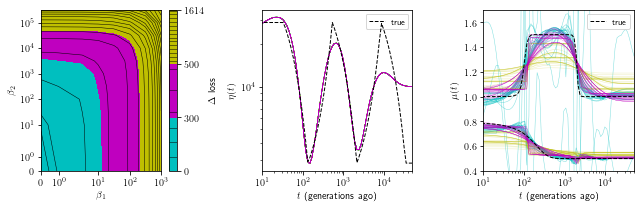

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

plt.sca(axes[0])
x = np.unique(heatmap_data[:, 0])
y = np.unique(heatmap_data[:, 1])
Z = heatmap_data[:, 2].reshape(len(x), len(y)).T
contour = plt.contour(x, y, Z, levels=20, colors='k', linewidths=.5)
heatmap = plt.contourf(contour, levels=[0, 300, 500, Z.max()], colors=['c', 'm', 'y'])
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel(r'$\Delta$ loss')
# Add the contour line levels to the colorbar
cbar.add_lines(contour)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')

for i, data in enumerate(heatmap_data):
    beta_tv, beta_spline, relative_loss, ksfs = data
        
    if heatmap.levels[1] <= relative_loss <= heatmap.levels[2]:
        alpha = .9
        zorder = 2
        color = 'm'
        lw = 0.2
    elif relative_loss <= heatmap.levels[1]:
        alpha = .5
        zorder = 1
        color = 'c'
        lw = .5
    else:
        alpha = .25
        zorder = 1
        color = 'y'
        lw = .5

    plt.sca(axes[1])
    ksfs.eta.plot(alpha=alpha, zorder=zorder, lw=lw, c=color)

    plt.sca(axes[2])
    ksfs.mu.plot((0, 1), alpha=alpha, zorder=zorder, lw=lw, c=color)

    
plt.sca(axes[1])
eta_true.plot(c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])
                 
plt.sca(axes[2])
mu_true.plot((0,), c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
mu_true.plot((1,), c='k', alpha=1, ls='--', lw=1, zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])
plt.ylim([0.4, 1.7])

plt.tight_layout()
plt.savefig('mu_sweep.pdf')